Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-3. Обучение с учителем: классификация**

---

## **✍ Оглавление:**

2. Логистическая регрессия
3. Метрики классификации. Преимущества и недостатки логистической регрессии
4. Мультиклассовая классификация
5. Практика: логистическая регрессия

---

## **2. Логистическая регрессия**

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным**.

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Модели, которые решают задачу классификации, называются **классификаторами (classifier)**.

**<center> ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ </center>**

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function)  — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**.

**В чём преимущество этой функции?**
У сигмоиды есть два очень важных для нас свойства:

➔ Значения сигмоиды σ(𝑧) лежат в диапазоне от 0 до 1 при любых значениях
аргумента 𝑧. Какой бы 𝑧 вы ни подставили, число меньше 0 или больше 1
вы не получите.
➔ Сигмоида выдаёт значения σ(𝑧) > 0. 5 при её аргументе 𝑧 > 0, σ(𝑧) < 0. 5,
при 𝑧 < 0 и σ(𝑧) = 0. 5 при 𝑧 = 0.

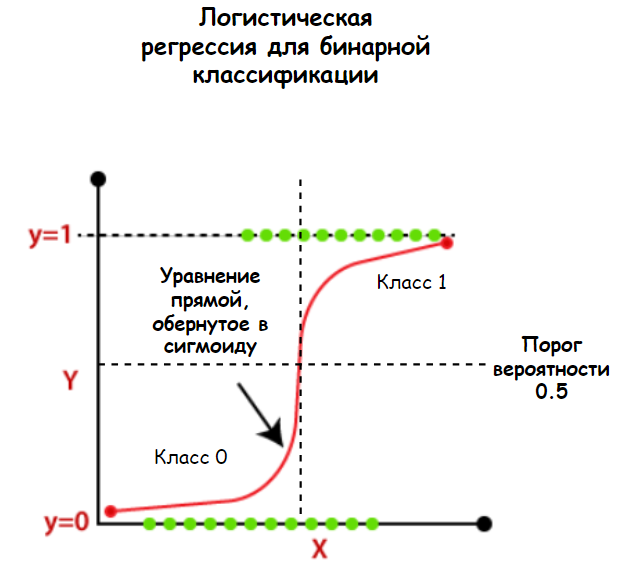

## **3. Метрики классификации. Преимущества и недостатки логистической регрессии**

**1. Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

**2. Accuracy (достоверность)** — это доля правильных ответов модели среди всех
ответов. Правильные ответы — это истинно положительные (True Positive) и
истинно отрицательные ответы (True Negative):

𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦 = (𝑇𝑃+𝑇𝑁) / (𝑇𝑃+𝑇𝑁+𝐹𝑁+𝐹P)

В виде диаграммы соотношение количества объектов, классы которых мы угадали и общего количества объектов записывается в следующем виде:

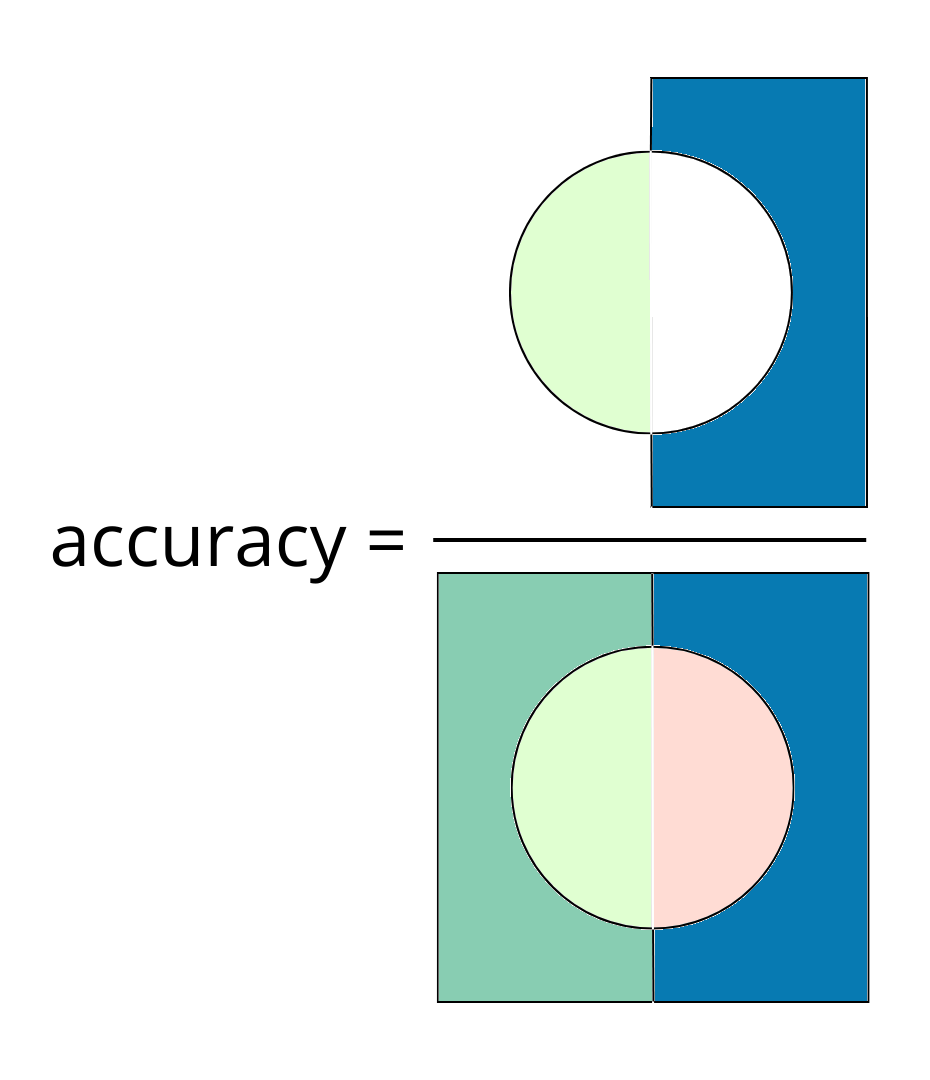

**Интерпретация:** как много (в долях) модель угадала ответов.

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы.

**3. Precision (точность), или PPV (Positive Predictive Value)** — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем названным положительными объектам.

𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = 𝑇𝑃 / (𝑇𝑃+𝐹P)

В виде диаграммы соотношение количества объектов класса 1, которые мы угадали и количества объектов, которые мы приняли за класс 1, записывается следующим образом:

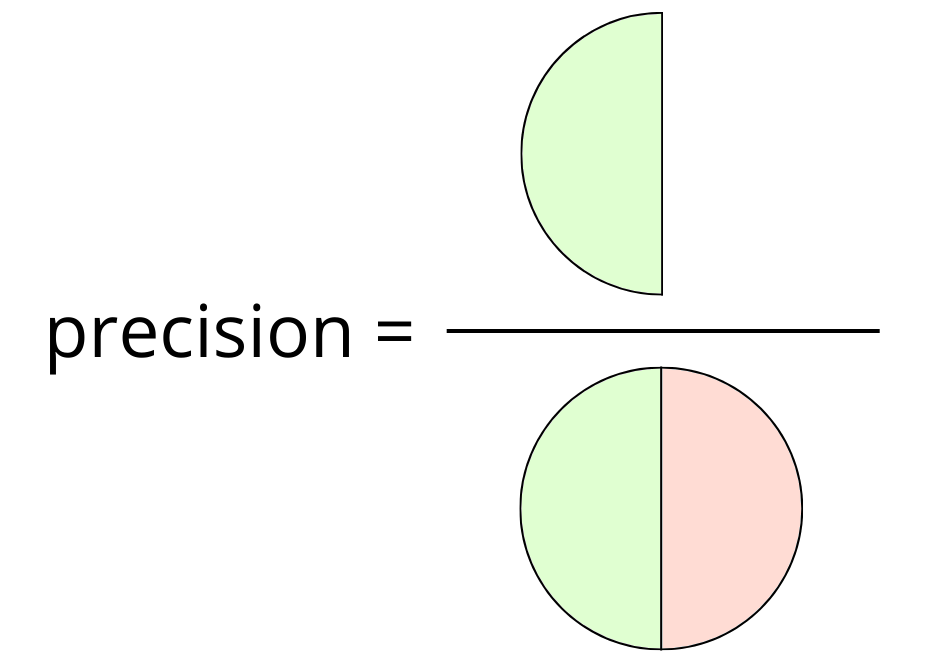

Метрика также изменяется от 0 до 1. 

Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. То есть чем ближе precision к 1, тем меньше вероятность модели допустить ошибку I рода.

Именно precision не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение False Positive и метрика снижается.

**4. Recall (полнота), или TPR (True Positive Rate)** — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем объектам положительного класса.

𝑟𝑒𝑐𝑎𝑙𝑙 = 𝑇𝑃 / (𝑇𝑃+𝐹N)

Диаграмма:

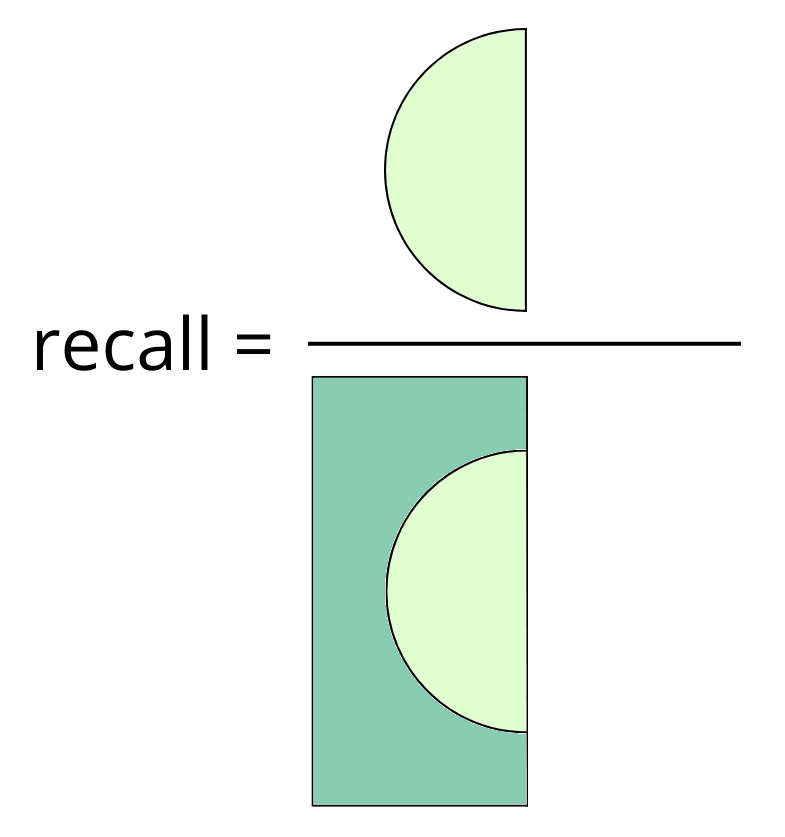

Метрика изменяется от 0 до 1.

**Интерпретация:** способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что метрика зависит от количества ложноотрицательных срабатываний. То есть чем ближе recall к 1, тем меньше вероятность модели допустить ошибку II рода.

Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

**5. 𝐹 β (F-мера) — это взвешенное среднее гармоническое между precision и recall:**

𝐹β = (1 + β2) * (𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛·𝑟𝑒𝑐𝑎𝑙𝑙 / ((β2 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛) + 𝑟𝑒𝑐𝑎𝑙𝑙))

где β — это вес precision в метрике: чем больше β, тем больший вклад.

**В чём преимущество F1-меры?**

Метрика равна своему максимуму (1), если и precision, и recall равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то и F1 будет близка к 0. 

**ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

Давайте обобщим всё вышесказанное и приведём достоинства и недостатки логистической регрессии.

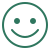

- Простой, интерпретируемый, но в то же время эффективный алгоритм. Благодаря этому он очень популярен в мире машинного обучения.
- Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая.
- Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.

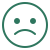

Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве baseline.

In [3]:
# Задание 3.6
from sklearn import metrics
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
 
print(f'{metrics.precision_score(y_true, y_pred):.2f}')

0.75


In [4]:
# Задание 3.7

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print(f'{metrics.recall_score(y_true, y_pred):.2f}')

0.60


In [5]:
# Задание 3.8

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print(f'{metrics.f1_score(y_true, y_pred):.2f}')

0.67


## **4. Мультиклассовая классификация**

✍ Ранее мы с вами рассмотрели основы бинарной классификации. Но что делать, когда классов, на которые необходимо разделить данные, больше 2? Например, классификация автомобилей по различным маркам или определение национальности по фотографии и т. д.

В таком случае используется очень простой подход, который называется **«один против всех» (one-vs-over)**.

**Идея** этого подхода очень простая. Если у нас есть k различных классов (k>2), давайте обучим  классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

Схематично это можно представить следующим образом:

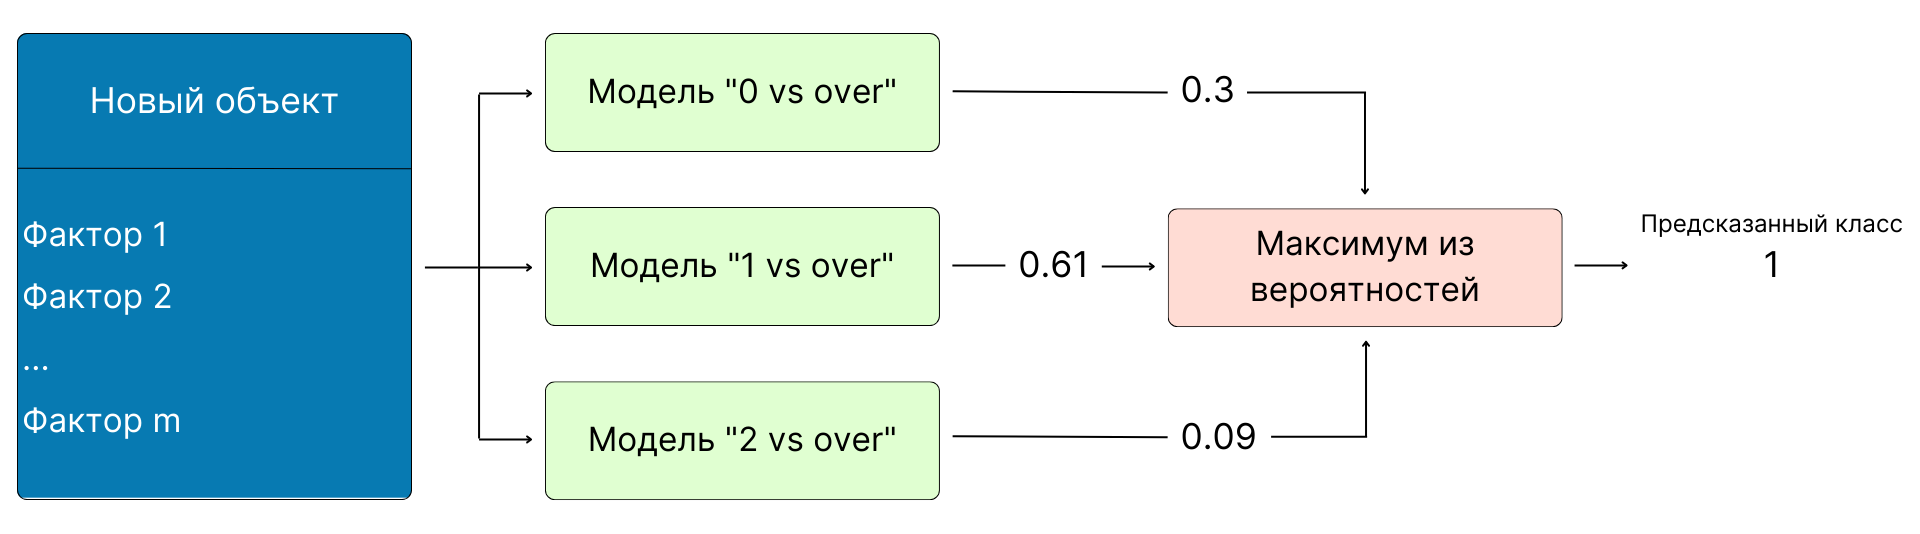

## **5. Практика: логистическая регрессия**